In [1]:
import pandas as pd

In [11]:
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape


(70000, 784)

In [5]:
 y.shape

(70000,)

In [7]:
mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

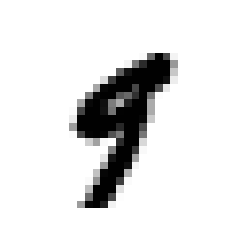

In [8]:
import matplotlib
import matplotlib.pyplot as plt

some_digit= X[36000]
some_digit_image= some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [24]:
y[36000]

'9'

In [25]:
X_test, X_train, y_test, y_train= X[:60000], X[60000:], y[:60000], y[60000:]

In [26]:
#Training a binary classifier

In [67]:
y_train_9 = (y_train == '9')
y_test_9 = (y_test == '9')

In [70]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_9)
sgd_clf.predict([some_digit])

array([False])

In [71]:
#Measuring accuracy using cross-validation

In [72]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [73]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_9):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_9[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_9[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) 

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9229154169166167
0.9336933693369337
0.9417941794179417


In [74]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring="accuracy")


array([0.92291542, 0.93369337, 0.94179418])

In [75]:
#Confusion Matrix

In [76]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)



In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_pred)


array([[8554,  437],
       [ 235,  774]], dtype=int64)

In [78]:
#Precision and Recall

In [79]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_9, y_train_pred)


0.639141205615194

In [80]:
recall_score(y_train_9, y_train_pred)

0.7670961347869177

In [81]:
from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred)

0.6972972972972973

In [82]:
#Precision/Recall Tradeoff

In [83]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-40131.66516806])

In [85]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [88]:
threshold = 200000
y_some_digit_pred = (y_scores < threshold)
y_some_digit_pred 

array([ True])

In [89]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
    method="decision_function")


In [90]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


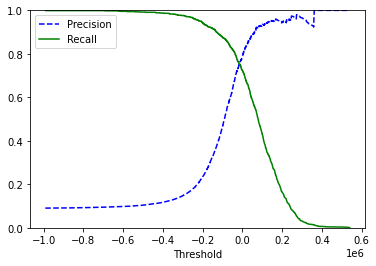

In [92]:
#Plot of precision and recall as functions of threshold values
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [93]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_9, y_train_pred_90)

0.001937984496124031

In [94]:
 recall_score(y_train_9, y_train_pred_90)

0.0009910802775024777

In [95]:
#The ROC Curve

In [96]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


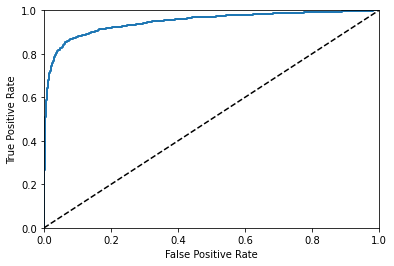

In [97]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [98]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_9, y_scores)

0.4092189315182378

In [99]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [100]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)


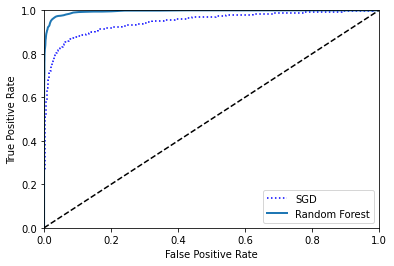

In [101]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [102]:
roc_auc_score(y_train_5, y_scores_forest)


0.995157204231829

In [103]:
#Multiclass Classification

In [104]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_9
sgd_clf.predict([some_digit])

array(['9'], dtype='<U1')

In [105]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-634549.01366616, -221141.92895551, -238005.58813124,
         -30645.72538499,  -77401.26710128, -178630.5290001 ,
        -435037.61151792,  -76892.95394121,  -81795.86121486,
         -30394.93554662]])

In [106]:
np.argmax(some_digit_scores)


9

In [107]:
sgd_clf.classes_


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [108]:
 sgd_clf.classes_[9]

'9'

In [109]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array(['4'], dtype=object)

In [110]:
len(ovo_clf.estimators_)


45

In [111]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])


array(['9'], dtype=object)

In [112]:
forest_clf.predict_proba([some_digit])


array([[0.01, 0.  , 0.  , 0.01, 0.28, 0.04, 0.01, 0.1 , 0.07, 0.48]])

In [113]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


array([0.82783443, 0.85448545, 0.8919892 ])

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.86412717, 0.89708971, 0.89528953])

In [115]:
#Error Analysis

In [116]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[ 933,    0,    9,    3,    3,   15,    8,    1,    7,    1],
       [   0, 1065,   10,    4,    0,    7,    3,    3,   42,    1],
       [   5,    6,  885,   19,   29,    8,   15,   13,   48,    4],
       [   2,    1,   30,  864,    0,   47,    4,   14,   31,   17],
       [   2,    3,   15,    0,  863,    3,   12,   13,   25,   46],
       [   8,    4,    5,   33,   23,  735,   12,    9,   44,   19],
       [  10,    4,   13,    1,   17,   29,  873,    2,    9,    0],
       [   6,    7,   18,    8,    9,    3,    0,  918,    8,   51],
       [   4,    4,   14,   20,    7,   37,    7,   10,  855,   16],
       [   7,    4,    6,   12,   34,    7,    0,   50,   25,  864]],
      dtype=int64)

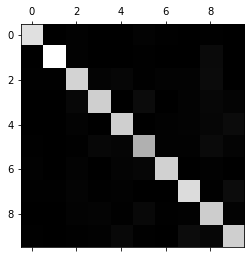

In [117]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [118]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

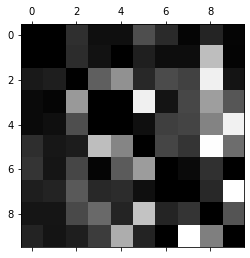

In [119]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [199]:
def plot_digits(instances, images_per_row=10, **options):
    size=28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    
    n_rows = (len(instances)- 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
                  
      


SyntaxError: invalid syntax (<ipython-input-199-fc68ef3cc479>, line 10)

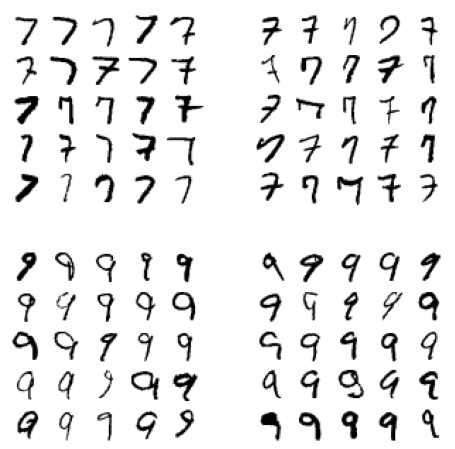

In [200]:
cl_a, cl_b = '7', '9'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [201]:
#Multioutput Classification

In [202]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test


In [207]:
#End!